In [1]:
import pandas as pd
import sankey


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def parse_convert(df):
    df['Protein'] = float(df.iloc[0][df.columns[2]].split(' ')[0]) * 4
    df['Fat'] = float(df.iloc[0][df.columns[3]].split(' ')[0]) * 9
    df['Carbohydrate'] = float(df.iloc[0][df.columns[6]].split(' ')[0]) * 4


In [4]:
def createData(html):
    dfs = pd.read_html(html)
    food = dfs[0].transpose().copy()
    headers = food.iloc[0]
    food = food[1:]
    food.columns = headers
    food.rename(columns={food.columns[0]: "Name"}, inplace = True)
    parse_convert(food)
    foodcals = food[['Protein', 'Fat', 'Carbohydrate']].copy()
    foodcals = foodcals.transpose()
    foodcals.rename(columns={foodcals.columns[0]: "calories"}, inplace = True)
    foodcals['Energy'] = 'Calories'
    data = []
    for index, row in foodcals.iterrows():
        data.append({'macro' : index, 'calories': row['calories'], 'target': row['Energy']})
    sanDf = pd.DataFrame(data)
    sanDf['dish'] = food.iloc[0]['Name']
    return sanDf


In [5]:
html = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Ngoh hiang, prawn fritter, dough</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">180.72 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">5.47 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">10.3 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">6.19 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">1.51 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">16.56 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">23.76 mg</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">251.28 mg</td></tr></tbody></table>'

html2 = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Chicken rice, with steamed chicken</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">557.7 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">28.05 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">13.86 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">4.95 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">3.3 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">80.19 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">36.63 mg</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">697.95 mg</td></tr></tbody></table>'

html3 = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Laksa</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">695.5 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">27.3 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">39.65 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">14.24 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">3.9 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">57.85 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">104 mg</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">7904 mg</td></tr></tbody></table>'

html4 = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Char kway teow</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">744.96 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">22.66 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">38.4 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">29.18 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">7.3 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">76.03 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">234.24 mg</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">1459.2 mg</td></tr></tbody></table>'



dfs = pd.read_html(html)

macro  calories    target                                dish
0       Protein     21.88  Calories    Ngoh hiang, prawn fritter, dough
1           Fat     92.70  Calories    Ngoh hiang, prawn fritter, dough
2  Carbohydrate     66.24  Calories    Ngoh hiang, prawn fritter, dough
3       Protein    112.20  Calories  Chicken rice, with steamed chicken
4           Fat    124.74  Calories  Chicken rice, with steamed chicken
5  Carbohydrate    320.76  Calories  Chicken rice, with steamed chicken
6       Protein    109.20  Calories                               Laksa
7           Fat    356.85  Calories                               Laksa
8  Carbohydrate    231.40  Calories                               Laksa
9       Protein     90.64  Calories                      Char kway teow


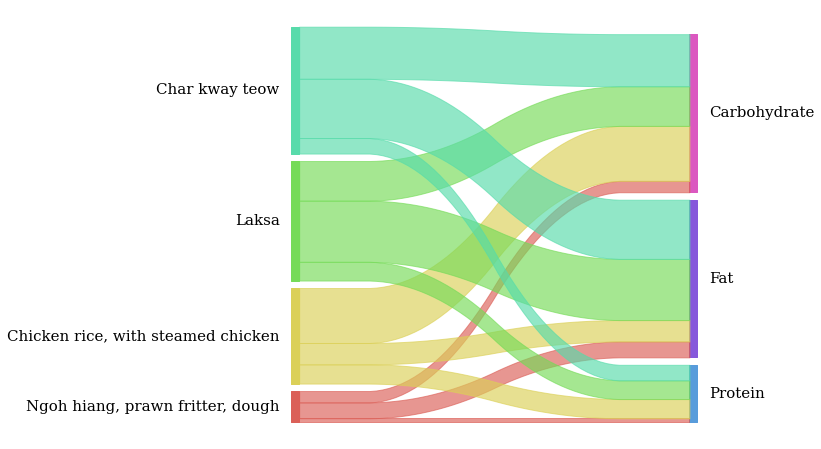

In [6]:
htmls = [html, html2, html3, html4]

datagrids = []
for item in htmls:
    datagrids.append(createData(item))
final = pd.concat(datagrids, ignore_index=True)
print(final.head(10))
final.to_csv('test.csv')
sankey.sankey(
    right=final['macro'], left=final['dish'], aspect=20,
    leftWeight=final['calories'],
    fontsize=15
)

plt.gcf().set_size_inches(8,8)

index         macro  calories    target           dish
0      0       Protein     48.64  Calories  Nuts, almonds
1      1           Fat    260.73  Calories  Nuts, almonds
2      2  Carbohydrate     45.16  Calories  Nuts, almonds
          macro  calories    target           dish
0       Protein     48.64  Calories  Nuts, almonds
1           Fat    260.73  Calories  Nuts, almonds
2  Carbohydrate     45.16  Calories  Nuts, almonds
0         Protein
1             Fat
2    Carbohydrate
Name: macro, dtype: object
   index         macro  calories    target         dish
0      0       Protein     29.16  Calories  Walnut, raw
1      1           Fat    315.18  Calories  Walnut, raw
2      2  Carbohydrate      6.08  Calories  Walnut, raw
          macro  calories    target         dish
0       Protein     29.16  Calories  Walnut, raw
1           Fat    315.18  Calories  Walnut, raw
2  Carbohydrate      6.08  Calories  Walnut, raw
0         Protein
1             Fat
2    Carbohydrate
Name: macro,

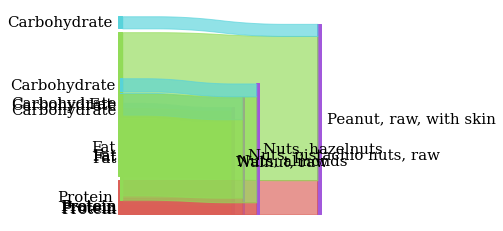

In [38]:
nuts = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Nuts, almonds</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">330.62 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">12.16 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">28.97 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">2.22 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">6.75 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">11.29 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">NA</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">0.57 mg</td></tr></tbody></table>'
nuts1 = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Walnut, raw</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">351.54 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">7.29 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">35.02 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">2.23 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">3.24 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">1.52 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">NA</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">1.52 mg</td></tr></tbody></table>'
nuts2 = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Peanut, raw, with skin</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">643.17 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">27.95 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">53.29 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">8.03 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">9.28 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">10.07 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">NA</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">1.13 mg</td></tr></tbody></table>'
nuts3 = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Nuts, pistachio nuts, raw</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">363.11 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">13.44 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">28.97 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">3.55 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">6.71 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">18.23 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">NA</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">0.65 mg</td></tr></tbody></table>'
nuts4 = '<table border="0" cellspacing="0" cellpadding="5" width="60%" style="border: solid 1px #c0ebfc;"><tbody><tr><td bgcolor="#c0ebfc">&nbsp;</td><td bgcolor="#c0ebfc" align="center" style="color: #369dc4;"><b>Nuts, hazelnuts</b></td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Energy (kcal)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">404.43 kcal</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Protein (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">9.63 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Total fat (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">39.12 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Saturated fat (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">2.87 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Dietary fibre (g)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">6.25 g</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Carbohydrate (g)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">10.75 g</td></tr><tr><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Cholesterol (mg)</td><td bgcolor="#daf4fe" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">NA</td></tr><tr><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" width="140px">Sodium (mg)</td><td bgcolor="#f1fbff" style="border-top: solid 1px #c0ebfc; border-right: solid 1px #c0ebfc;" align="right">NA</td></tr></tbody></table>'




nuts_array = [nuts, nuts1, nuts2, nuts3, nuts4]
for nut in nuts_array:
    #need to create new figure to prevent saving over
    plt.figure()
    nutsDf = createData(nut)
    print(nutsDf.reset_index())
    print(nutsDf.head())
    print(nutsDf['macro'])
    nutsDf.to_csv('nuts.csv')
    sankey.sankey(
        left=nutsDf['macro'], right=nutsDf['dish'], leftWeight=nutsDf['calories'], aspect=20,
        fontsize=15
    )
    plt.gcf().set_size_inches(4,4)
    plt.savefig(f"{''.join(nutsDf['dish']).replace(',','').replace(' ','')}.png",bbox_inches='tight',dpi=150)

The following arguments are deprecated and should be removed: figureName in sankey()
   id customer    good  revenue
0   0     John   fruit      5.5
1   1     Mike    meat     11.0
2   2    Betty  drinks      7.0
3   3      Ben   fruit      4.0
4   4    Betty   bread      2.0


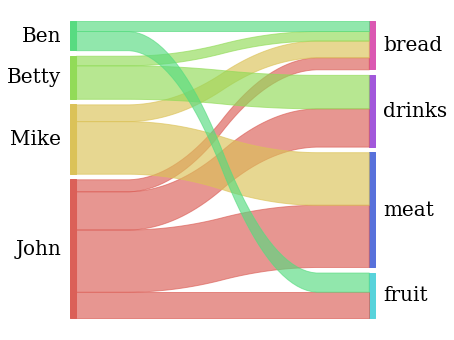

In [8]:
df = pd.read_csv(
    'customers-goods.csv', sep=',',
    names=['id', 'customer', 'good', 'revenue'],
    skiprows=1
)
print(df.head())
sankey.sankey(
    left=df['customer'], right=df['good'], leftWeight=df['revenue'], aspect=20,
    fontsize=20, figureName="customer-good"
)
plt.gcf().set_size_inches(6,6)

In [9]:
fruitscolorDict =  {'apple':'#f71b1b','blueberry':'#1b7ef7','banana':'#f3f71b','lime':'#12e23f','orange':'#f78c1b', 'kiwi': '#FFFFFF'}

In [10]:
df = pd.read_csv('./fruits.txt',sep = ' ',names=['true','predicted'])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


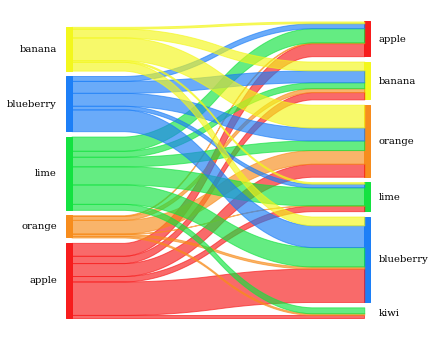

In [12]:
sankey.sankey(df['true'],df['predicted'],aspect=20,colorDict=fruitscolorDict,fontsize=10)
plt.gcf().set_size_inches(6,6)
plt.savefig('fruits.png',bbox_inches='tight',dpi=150)

In [13]:
createData(html2)

,macro,calories,target,dish
0,Protein,112.20,Calories,"Chicken rice, with steamed chicken"
1,Fat,124.74,Calories,"Chicken rice, with steamed chicken"
2,Carbohydrate,320.76,Calories,"Chicken rice, with steamed chicken"


In [14]:
food = dfs[0].transpose().copy()

In [15]:
food.head()

,0,1,2,3,4,5,6,7,8
0,NaN,Energy (kcal),Protein (g),Total fat (g),Saturated fat (g),Dietary fibre (g),Carbohydrate (g),Cholesterol (mg),Sodium (mg)
1,"Ngoh hiang, prawn fritter, dough",180.72 kcal,5.47 g,10.3 g,6.19 g,1.51 g,16.56 g,23.76 mg,251.28 mg


In [16]:
headers = food.iloc[0]
food = food[1:]
food.columns = headers

In [17]:
food.head()

,NaN,Energy (kcal),Protein (g),Total fat (g),Saturated fat (g),Dietary fibre (g),Carbohydrate (g),Cholesterol (mg),Sodium (mg)
1,"Ngoh hiang, prawn fritter, dough",180.72 kcal,5.47 g,10.3 g,6.19 g,1.51 g,16.56 g,23.76 mg,251.28 mg


In [18]:
food.rename(columns={food.columns[0]: "Name"}, inplace = True)
food.head()

,Name,Energy (kcal),Protein (g),Total fat (g),Saturated fat (g),Dietary fibre (g),Carbohydrate (g),Cholesterol (mg),Sodium (mg)
1,"Ngoh hiang, prawn fritter, dough",180.72 kcal,5.47 g,10.3 g,6.19 g,1.51 g,16.56 g,23.76 mg,251.28 mg


In [19]:
colorDict = {
    'Protein':'#f71b1b',
    'Fat':'#1b7ef7',
    'Carbohydrate':'#f3f71b',
    'Calories':'#12e23f',
    'orange':'#f78c1b'
}

In [20]:
food['Protein'] = float(food.iloc[0][food.columns[2]].split(' ')[0]) * 4
food['Fat'] = float(food.iloc[0][food.columns[3]].split(' ')[0]) * 9
food['Carbohydrate'] = float(food.iloc[0][food.columns[6]].split(' ')[0]) * 4


In [21]:
food.head()

,Name,Energy (kcal),Protein (g),Total fat (g),Saturated fat (g),Dietary fibre (g),Carbohydrate (g),Cholesterol (mg),Sodium (mg),Protein,Fat,Carbohydrate
1,"Ngoh hiang, prawn fritter, dough",180.72 kcal,5.47 g,10.3 g,6.19 g,1.51 g,16.56 g,23.76 mg,251.28 mg,21.88,92.7,66.24


In [22]:
foodcals = food[['Protein', 'Fat', 'Carbohydrate']].copy()
foodcals.head()

,Protein,Fat,Carbohydrate
1,21.88,92.7,66.24


In [23]:
foodcals = foodcals.transpose()
foodcals.head()

,1
0,
Protein,21.88
Fat,92.70
Carbohydrate,66.24


In [24]:
foodcals.rename(columns={foodcals.columns[0]: "calories"}, inplace = True)

In [25]:
foodcals['Energy'] = 'Calories'
foodcals.head()

,calories,Energy
0,,
Protein,21.88,Calories
Fat,92.70,Calories
Carbohydrate,66.24,Calories


In [26]:
sankey.sankey(
    right=foodcals['Energy'], left=foodcals.index, rightWeight=foodcals['calories'], aspect=20,
    fontsize=20, figure_name="customer-good"
)

TypeError: sankey() got an unexpected keyword argument 'figure_name'

In [27]:
data = []
for index, row in foodcals.iterrows():
    data.append({'macro' : index, 'calories': row['calories'], 'target': row['Energy']})


In [28]:
sanDf = pd.DataFrame(data)

In [29]:
sanDf.head()
sanDf['dish'] = "ngoh hiang"

In [30]:
sankey.sankey(
    right=sanDf['macro'], left=sanDf['dish'], rightWeight=sanDf['calories'], aspect=20,
    fontsize=20, figure_name="customer-good"
)

TypeError: sankey() got an unexpected keyword argument 'figure_name'